In [1]:
%pylab inline

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

import pandas as pd
import os
import json
import scipy.stats as spst

Populating the interactive namespace from numpy and matplotlib


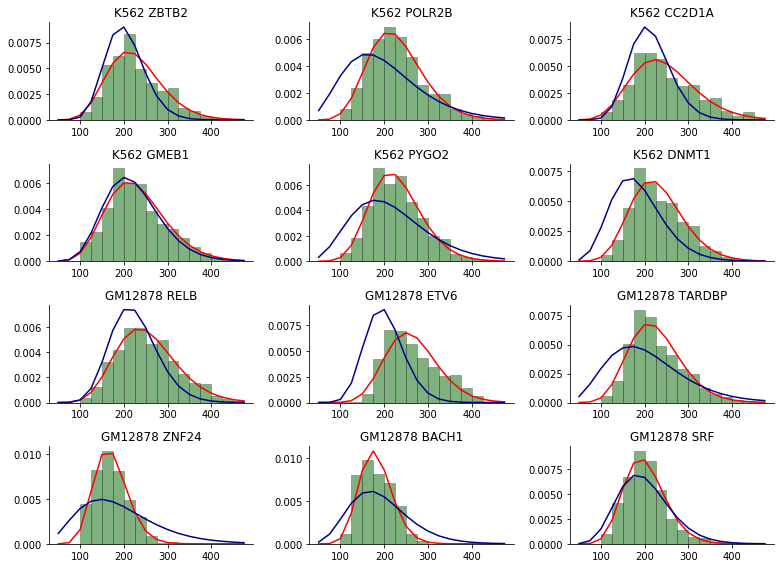

In [11]:
FRAGDIR = "/storage/mgymrek/chipmunk/encode"
FACTORS = ["K562_ZBTB2_ENCFF294LPO_ENCFF551YGS",
           "K562_POLR2B_ENCFF454PCU_ENCFF729LTY",
           "K562_CC2D1A_ENCFF054TBR_ENCFF051PEB",
           "K562_GMEB1_ENCFF809QWF_ENCFF154QJU",
           "K562_PYGO2_ENCFF288JVH_ENCFF078LXS",
           "K562_DNMT1_ENCFF987HMB_ENCFF958LLL",
           "GM12878_RELB_ENCFF708KIW_ENCFF355VTC",
           "GM12878_ETV6_ENCFF425VPI_ENCFF959JZX",
          "GM12878_TARDBP_ENCFF673WUM_ENCFF016QUV",
          "GM12878_ZNF24_ENCFF699QHD_ENCFF882PND",
          "GM12878_BACH1_ENCFF518TTP_ENCFF866OLZ", 
           "GM12878_SRF_ENCFF387RFR_ENCFF500GHH"
          ] 
# GM12878_IKZF1_ENCFF216YZE_ENCFF795PEX seg fault
# GM12878_ETV6_ENCFF425VPI_ENCFF959JZX trying as an alternative so don't need to wait for segfault issue

fig = plt.figure()
fig.set_size_inches((11, 8))
fignum = 1
for fac in FACTORS:
    try:
        frags = [int(item.strip()) for item in open(os.path.join(FRAGDIR, fac, fac+".paired.frags.txt"), "r").readlines()]
    except FileNotFoundError: print("No frags for %s"%fac)    
    ax = fig.add_subplot(4, 3, fignum)
    bins = np.arange(50, 500, 25)
    ax.hist(frags, bins=bins, color="darkgreen", edgecolor="black", linewidth=0.5, alpha=0.5, density=True)
    #ax.set_xlabel("Fragment length", size=15)
    #ax.set_ylabel("Frequency", size=15);
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_title(fac.split("_")[0] + " " + fac.split("_")[1])
    # Plot Gamma fit for paired and single
    try:
        paired_model = json.load(open(os.path.join(FRAGDIR, fac, fac+".paired.json"), "r"))
        ax.plot(bins, spst.gamma(paired_model["frag"]["k"], 0, paired_model["frag"]["theta"]).pdf(bins), color="red")
    except FileNotFoundError: print("No paired model for %s"%fac)
    try:
        single_model = json.load(open(os.path.join(FRAGDIR, fac, fac+".json"), "r"))
        ax.plot(bins, spst.gamma(single_model["frag"]["k"], 0, single_model["frag"]["theta"]).pdf(bins), color="darkblue")
    except FileNotFoundError: print("No single model for %s"%fac)
    fignum += 1
fig.tight_layout()
fig.savefig("SuppFig_FragLens.pdf")